# Las podas de backtracking

El algoritmo de backtracking hace la misma recursión que fuera bruta, pero agrega una estrategia de podas para ramas de dos tipos:
- podas por factibilidad: se eliminan las ramas no factibles
- podas por optimalidad: se eliminan las ramas que no serán óptimas.

Ahora veremos como se comportan ambas podas para distintos conjuntos.

Hipotesis:
- La poda de factibilidad no es efectiva cuando los $r_i$ son altos y los $w_i$ bajos, pero optimalidad si es efectiva en estas codiciones.
- La poda de optimalidad no es efectiva cuando los $w_i$ son altos y los $r_i$ bajos, pero factibilidad si es efectiva en estas codiciones.

Para esto haremos el siguiente procedimiento:
1. Cremos instancias para distitnso $n$ donde los $r_i$ son altos y los $w_i$ bajos, y otra donde los $w_i$ son altos y los $r_i$ bajos.
2. Tomamos muestras de la ejecución de ambas muestras en tres algoritmos propuestos:
    1. Backtracking full, ambas podas.
    2. Fuerza bruta + poda de factibilidad. Sin poda de optimalidad.
    3. Fuerza bruta + poda de optimalidad. Sin poda de factibilidad.
3. Graficamos esto en comparación con $f(x) = 2^n$, que seria el comportamiento de backtracking sin ninguna poda.

In [1]:
import numpy as np
import time
import os
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
def gen(
    ns,
    _path,
    k = 10,
    _R = (5000, 6000),
    _w = (1, 10),
    _r = (80, 100)
):
    for i in ns:
        for j in range(k):
            R = np.random.randint((_R[1] - _R[0])) + _R[0]
            w = np.random.randint((_w[1] - _w[0]), size = i) + _w[0]
            r = np.random.randint((_r[1] - _r[0]), size = i) + _r[0]
            f = open((_path + "{}_{}.in").format(i, j), "x")
            f.write("{} {}\n".format(i, R))
            for l in range(i-1):
                f.write("{} {}\n".format(w[l], r[l]))
            f.write("{} {}".format(w[i-1], r[i-1]))
            f.close()

In [3]:
ns_pesados = np.arange(30, 60)
ns_resistentes = np.arange(1, 20)

In [4]:
!rm -rf ../instancias/podas
!mkdir ../instancias/podas
!mkdir ../instancias/podas/pesados
!mkdir ../instancias/podas/resistentes

_k = 20

gen(ns_pesados, "../instancias/podas/pesados/", _w = (200, 400), _r = (900, 1000), k = _k)


Generamos 2 sets de  10 instancias de cada $n$ de 10 a 20.

- set _pesados_ con los $w_i$ entre 300 y 400 y los $r_i$ entre 800 y 1000
- set _resitentes_ los $w_i$ entre 1 y 100 y los $r_i$ entre 3000 y 4000

Ejecutemos los algoritmos en todos los sets!

In [5]:
def experimentar(ns, path):
    timepos_ambas = []
    tiempos_opt = []
    tiempos_fact = []

    for i in ns:
        tiempo_acum_ambas = 0
        tiempo_acum_opt = 0
        tiempo_acum_fact = 0

        for j in range(_k):
            start = time.time()
            os.system(("./../algo3-tp1 ./../" + path + "{}_{}.in 2").format(i, j))
            tiempo_acum_ambas += time.time() - start

            start = time.time()
            os.system("./../algo3-tp1 ./../" + path + "{}_{}.in 5".format(i, j))
            tiempo_acum_opt += time.time() - start

            start = time.time()
            os.system("./../algo3-tp1 ./../" + path + "{}_{}.in 4".format(i, j))
            tiempo_acum_fact += time.time() - start 


        timepos_ambas.append(tiempo_acum_ambas / _k)
        tiempos_opt.append(tiempo_acum_opt / _k)
        tiempos_fact.append(tiempo_acum_fact / _k)
    
    return [timepos_ambas, tiempos_opt, tiempos_fact]

In [6]:
os.system("g++ ../src/main.cpp -o ../algo3-tp1")

y_resistentes = experimentar(ns_resistentes, "instancias/podas/resistentes/")

Los graficamos:

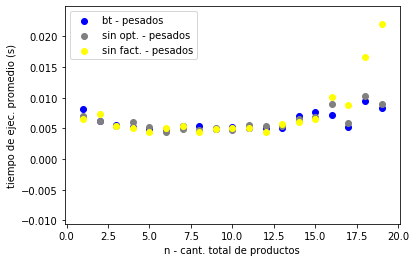

In [15]:
plt.scatter(ns_resistentes, y_resistentes[0], color = 'blue', label = "bt - pesados")
plt.scatter(ns_resistentes, y_resistentes[1], color = 'grey', label = "sin opt. - pesados")
plt.scatter(ns_resistentes, y_resistentes[2], color = 'yellow', label = "sin fact. - pesados")

plt.xlabel("n - cant. total de productos")
plt.ylabel("tiempo de ejec. promedio (s)")
plt.legend()

# Show the plot
plt.show()

In [13]:
y_pesados = experimentar(ns_pesados, "instancias/podas/pesados/")

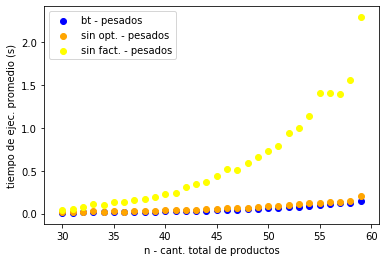

In [22]:
plt.scatter(ns_pesados, y_pesados[0], color = 'blue', label = "bt - pesados")
plt.scatter(ns_pesados, y_pesados[1], color = 'orange', label = "sin opt. - pesados")
plt.scatter(ns_pesados, y_pesados[2], color = 'yellow', label = "sin fact. - pesados")

plt.xlabel("n - cant. total de productos")
plt.ylabel("tiempo de ejec. promedio (s)")
plt.legend()

# Show the plot
plt.show()

No se ve muy bien para los resistentes...

In [17]:
!rm -rf ../instancias/podas/resistentes
!mkdir ../instancias/podas/resistentes
ns_resistentes = np.arange(10, 25)
gen(ns_resistentes, "../instancias/podas/resistentes/", _w = (1, 100), _r = (1000, 1500), k = _k)
y_resistentes = experimentar(ns_resistentes, "instancias/podas/resistentes/")

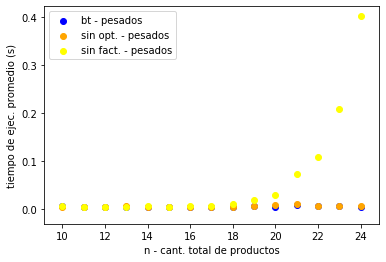

In [21]:
plt.scatter(ns_resistentes, y_resistentes[0], color = 'blue', label = "bt - pesados")
plt.scatter(ns_resistentes, y_resistentes[1], color = 'orange', label = "sin opt. - pesados")
plt.scatter(ns_resistentes, y_resistentes[2], color = 'yellow', label = "sin fact. - pesados")

plt.xlabel("n - cant. total de productos")
plt.ylabel("tiempo de ejec. promedio (s)")
plt.legend()

# Show the plot
plt.show()